# Final Project

### Table of Contents
- [Project Overview](#project-overview)
- [Libraries](#libraries)
- [Data Cleaning](#data-acquisition-and-cleaning)
- [Features Preparation](#handling-categorical-variables-and-standardizing-numeric-features)
- [Logistic Regression](#logistic-regression)
- [K-mean](#k-means-clustering)
- [Conclusions](#storytelling-and-conclusions)

## Project Overview
### UCI Bank Marketing Dataset

**Domain:** Marketing / Business Analytics

**Description:** This dataset contains records from direct marketing campaigns (phone calls) of a Portuguese banking institution. The goal is to predict whether a client will subscribe to a term deposit. Features include client demographics (age, job, marital status, education), campaign details (contact type, month, duration, number of contacts), and economic indicators.

### Research Questions
1. Who is more likely to accept a term deposit, and which target audience should this marketing campaign focus on? 

2. How the economic situation influences user choices.

### Data Justification
The Bank Marketing Dataset is well-suited for this analysis because it integrates customer demographic information with campaign characteristics and macroeconomic indicators over the 2008–2010 period. This structure allows for examination of how individual client attributes and broader economic conditions influence subscription decisions. The dataset contains 4,119 observations and 20 input features, providing sufficient variability for exploratory analysis and predictive modeling. The binary outcome variable enables modeling the probability of a customer subscribing to a term deposit (“yes” or “no”), making the dataset appropriate for classification-based analysis.

### bank client data:
1 - age (numeric)
  
2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
  
3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric) 

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

### related with the last contact of the current campaign:

9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

### other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

### Additional columns: 

emp.var.rate	Employment change	

cons.price.idx	Inflation level (CPI)	

cons.conf.idx	Consumer confidence 

euribor3m	3-month interest rate	

nr.employed	Total employment level	

Output variable (desired target):
17 - y - has the client subscribed a term deposit? (binary: "yes","no")

## Libraries 

In [1]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder
)
from sklearn.model_selection import (
    train_test_split,
)
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    precision_recall_curve,
    classification_report,
    ConfusionMatrixDisplay
)

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Data Acquisition and Cleaning

Data Source: https://archive.ics.uci.edu/dataset/222/bank+marketing

Related paper: https://repositorio.iscte-iul.pt/bitstream/10071/9499/5/dss_v3.pdf

### Bank client data:
    1 - age (numeric)
    2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                        "blue-collar","self-employed","retired","technician","services") 
    3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
    4 - education (categorical: "unknown","secondary","primary","tertiary")
    5 - default: has credit in default? (binary: "yes","no")
    6 - balance: average yearly balance, in euros (numeric) 
    7 - housing: has housing loan? (binary: "yes","no")
    8 - loan: has personal loan? (binary: "yes","no")

### related with the last contact of the current campaign:
    9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
    10 - day: last contact day of the month (numeric)
    11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
    12 - duration: last contact duration, in seconds (numeric)

### other attributes:
    13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
    15 - previous: number of contacts performed before this campaign and for this client (numeric)
    16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

### Additional columns: 
    17 - emp.var.rate	Employment change	
    18 - cons.price.idx	Inflation level (CPI)	
    19 - cons.conf.idx	Consumer confidence 
    20 - euribor3m	3-month interest rate	
    21 - nr.employed	Total employment level	

### Output variable (desired target):
    22 - y has the client subscribed a term deposit? (binary: "yes","no")

### Data loading cleaning

In [2]:
df = pd.read_csv("./data/bank-additional/bank-additional.csv", sep=';')

In [3]:
df.shape 

(4119, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

<Axes: >

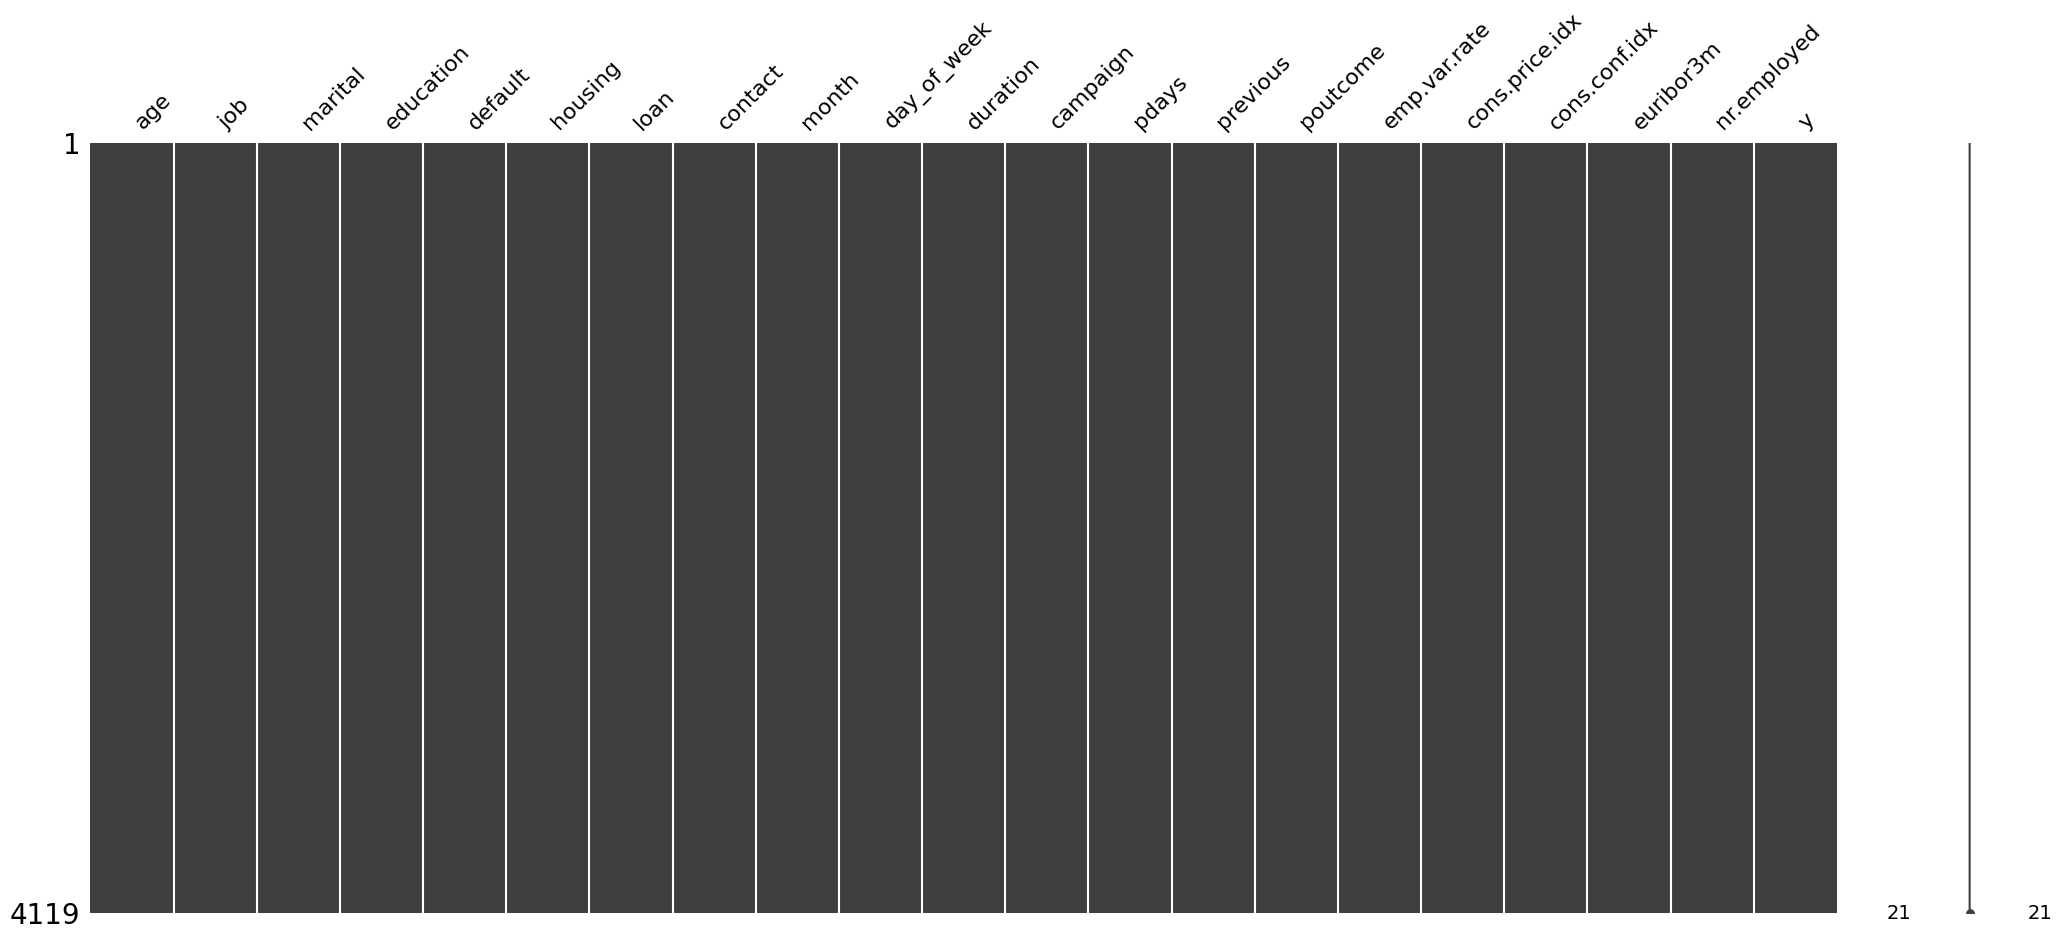

In [5]:
msno.matrix(df)

The dataset contains no missing values. All columns contain a total of 4119 observations.

In [6]:
df.describe() 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Since Data description suggests that using duration column is almost like cheating (because we want to predict if future call will be successful, but we can't know it from future), I will not use this column

In [7]:
(df.eq("unknown").mean() * 100).round(2)

age                0.00
job                0.95
marital            0.27
education          4.05
default           19.50
housing            2.55
loan               2.55
contact            0.00
month              0.00
day_of_week        0.00
duration           0.00
campaign           0.00
pdays              0.00
previous           0.00
poutcome           0.00
emp.var.rate       0.00
cons.price.idx     0.00
cons.conf.idx      0.00
euribor3m          0.00
nr.employed        0.00
y                  0.00
dtype: float64

The default value has a percentage of unknowns of almost 20%, further research will be conducted to determine or remove this bias. All other variables will be retained as their missing percentages were small and unlikely to significantly affect the model performance or overall conclusions.

In [8]:
yes_percent = (df['y'] == "yes").mean() * 100
print("Yes percent:", round(yes_percent, 2))

Yes percent: 10.95


The default variable contains a high percentage of unknown values, also most rows that has value different from "unknown" has "no" value. Removing rows with "unknown" in "default" column significantly change the proportion of customers who subscribe, introducing selection bias.

This is because the variable carries almost no useful signal: default “yes” is rare, default “no” dominates, the model cannot extract patterns from this feature, and the dataset becomes cleaner and more stable when the default column is dropped entirely.

In [9]:
df_new = df.drop(columns=['duration', 'default'])

df_new.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,unknown,unknown,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [10]:
# Target
target_col = "y"

# Numeric columns
numeric_cols = [
    "age", "campaign", "pdays", "previous",
    "emp.var.rate", "cons.price.idx",
    "cons.conf.idx", "euribor3m", "nr.employed"
]

# Categorical columns
categorical_cols = [
    "job", "marital", "education", "housing",
    "loan", "contact", "month", "day_of_week", "poutcome"
]

## Exploratory Data Analysis

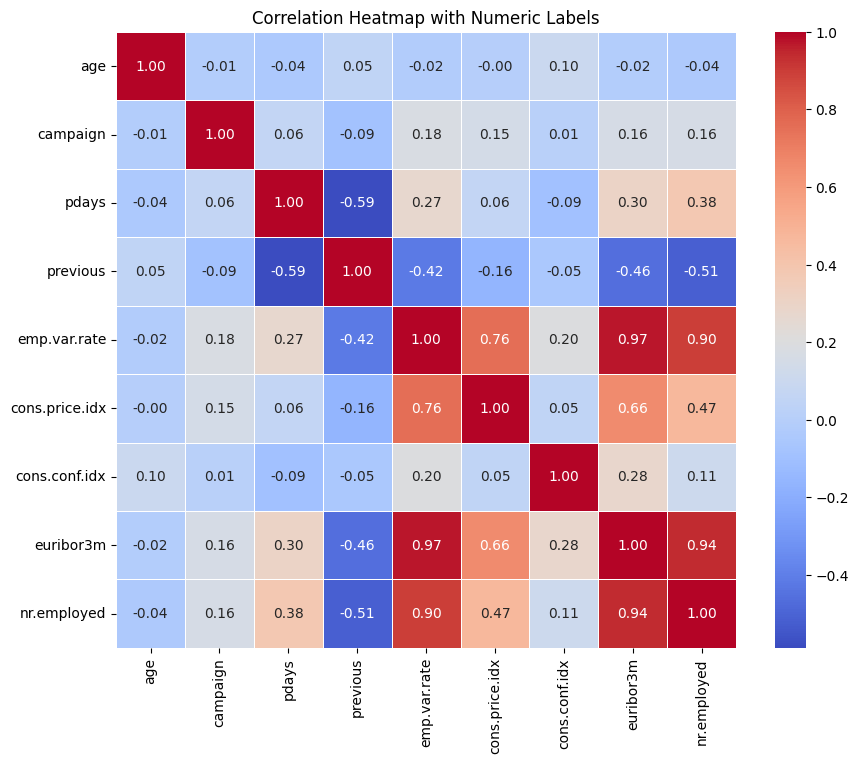

In [11]:
# multicollinearity test 

plt.figure(figsize=(10, 8))
sns.heatmap(
    df[numeric_cols].corr(),
    annot=True,         
    fmt=".2f",          
    cmap="coolwarm", 
    linewidths=0.5
)
plt.title("Correlation Heatmap with Numeric Labels")
plt.show()

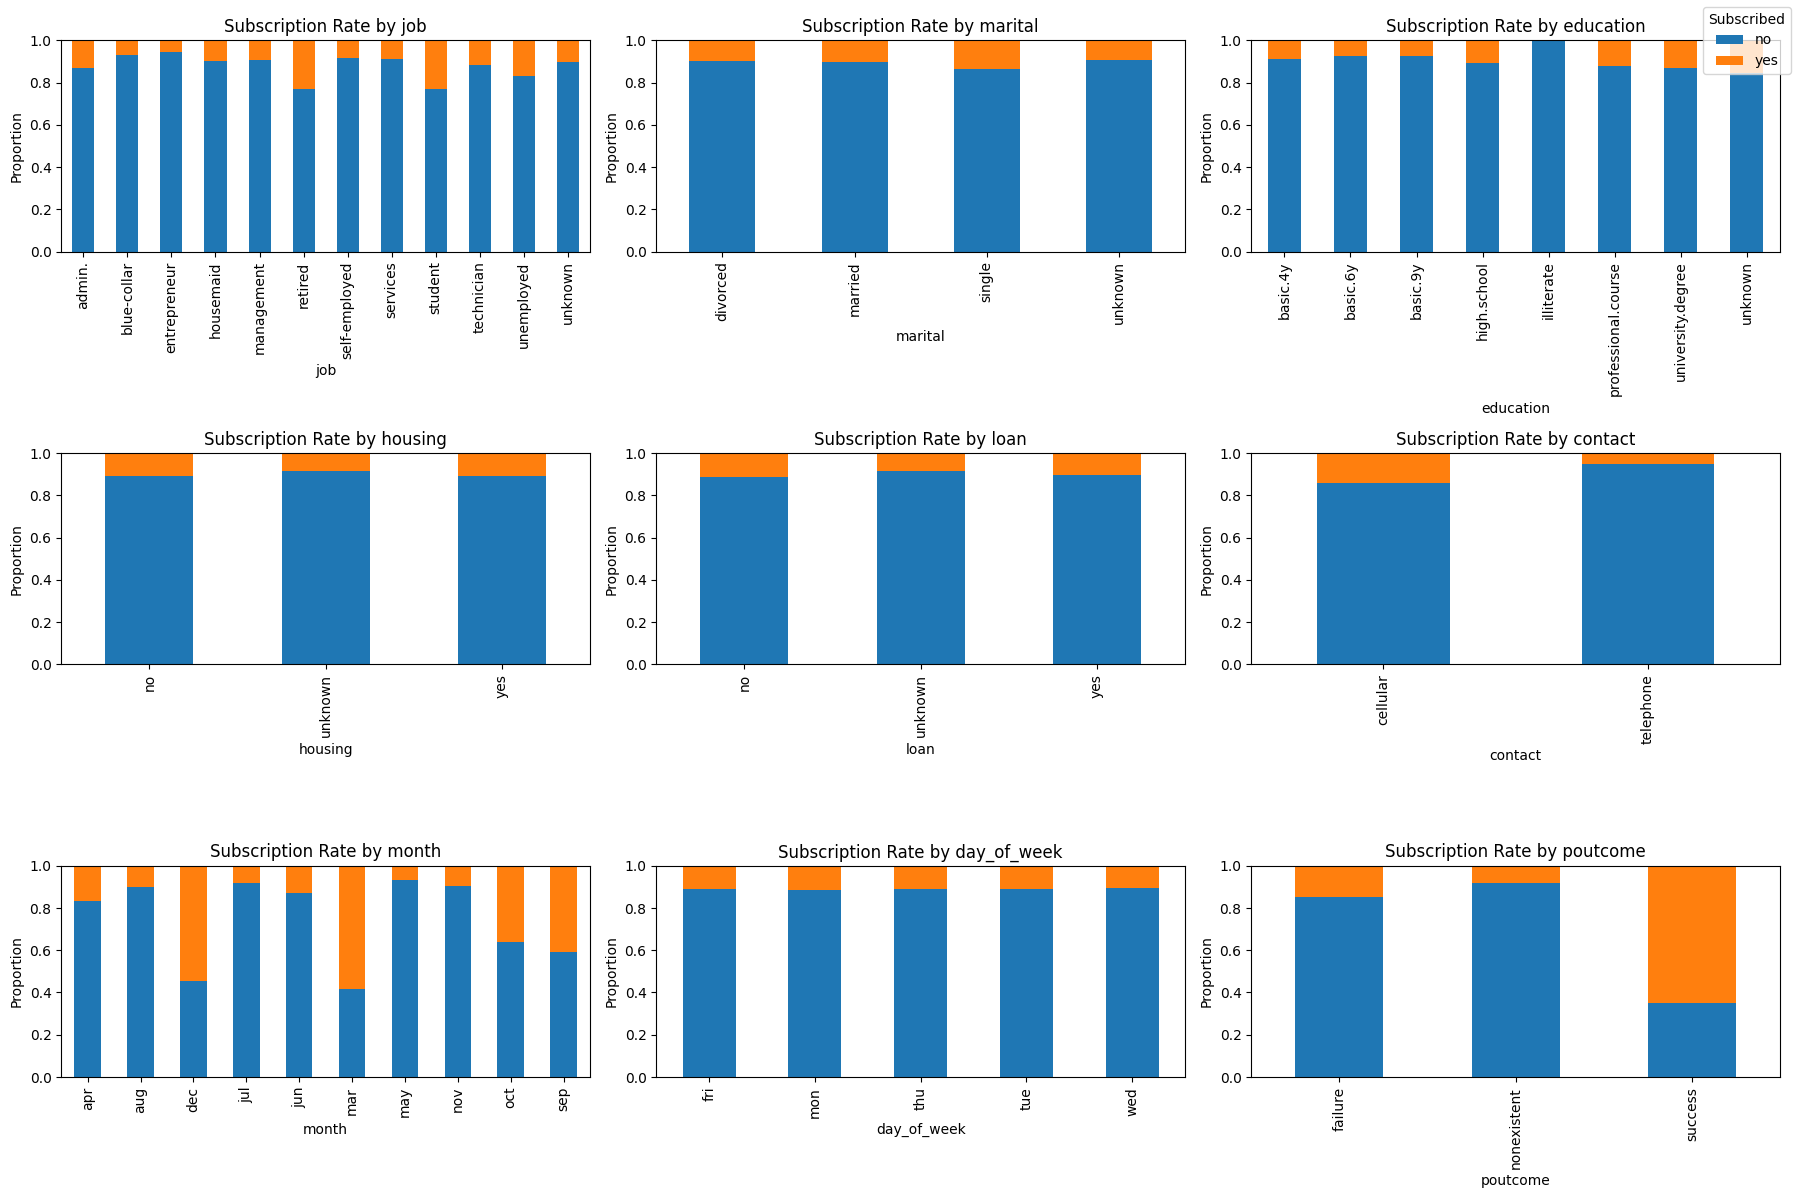

In [12]:
n_cols = 3
n_rows = math.ceil(len(categorical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ct = pd.crosstab(df[col], df['y'], normalize='index')
    ct.plot(
        kind='bar',
        stacked=True,
        ax=axes[i],
        legend=False
    )
    
    axes[i].set_title(f"Subscription Rate by {col}")
    axes[i].set_ylabel("Proportion")
    axes[i].set_xlabel(col)
    axes[i].set_ylim(0, 1)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Global legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    title="Subscribed",
    loc="upper right"
)

plt.tight_layout()
plt.show()

The users who most often subscribe to this marketing campaign are: 

Retirees, students, unemployed, or administrators,

Single customets,

People with more than a high school education,

The availability of housing or credit does not greatly influence the user's choice,

People who were contacted on cellular,

Said "yes" to a previous ad campaign.

Marketing campaigns are more successful in December, March, September, and October.

The day of the week when the user where contacted does not affect the decision a lot.


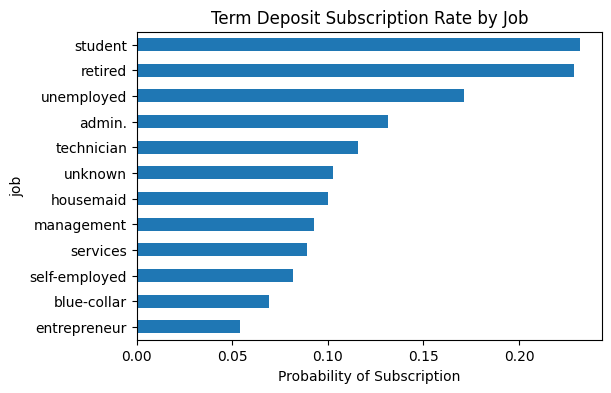

In [13]:
success_rate = (
    df.groupby('job')['y']
      .apply(lambda x: (x == 'yes').mean())
      .sort_values()
)

success_rate.plot(kind='barh', figsize=(6,4))
plt.title("Term Deposit Subscription Rate by Job")
plt.xlabel("Probability of Subscription")
plt.show()


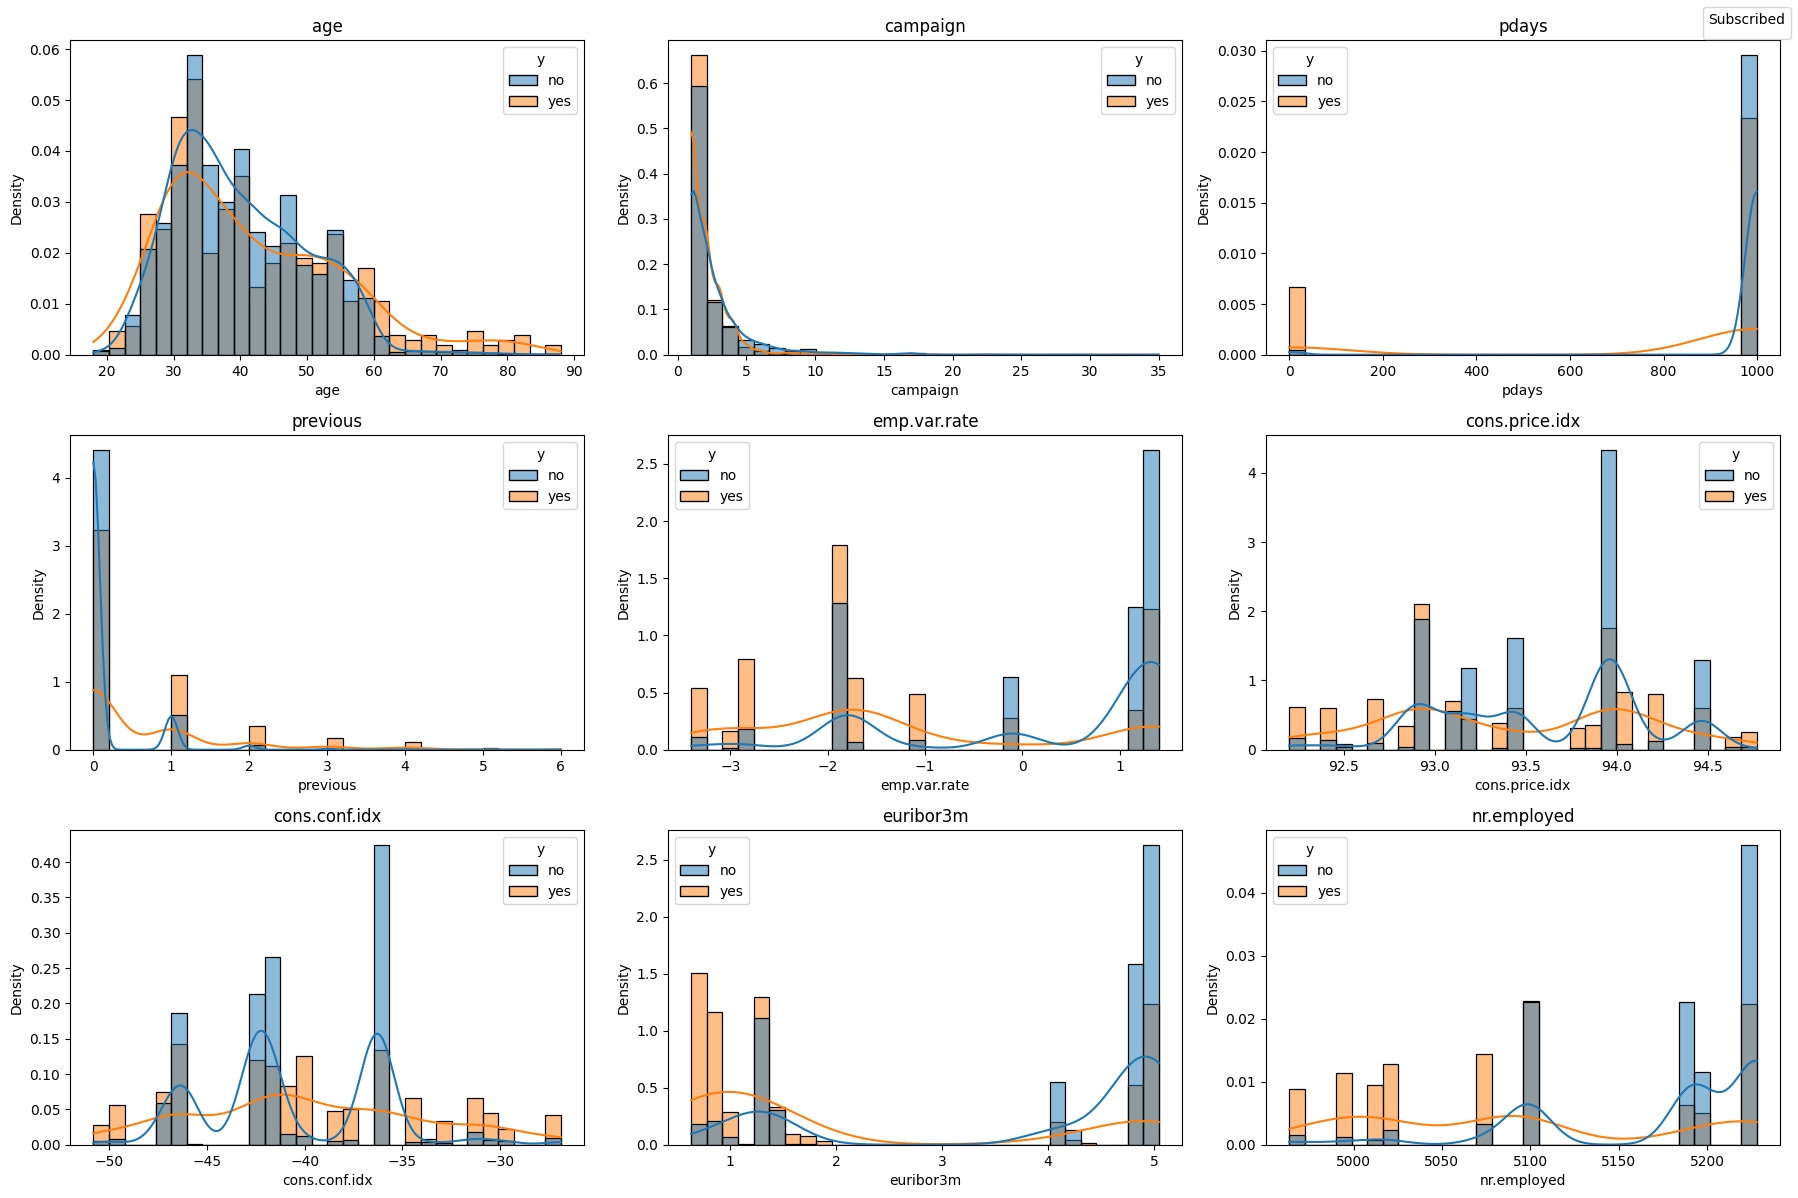

In [14]:
n_cols = 3
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(
        data=df,
        x=col,
        hue="y",
        kde=True,
        bins=30,
        stat="density",
        common_norm=False,
        ax=axes[i]
    )
    
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    title="Subscribed",
    loc="upper right"
)

plt.tight_layout()
plt.show()

People younger than 35 and older than 55 are more likely to subscribe.

People who are interested in a marketing company will say "Yes" after 1-2 calls, while additional cash is redundant and will most likely not lead to success.

Those who were contacted recently are more likely to subscribe than those who weren't. 

Contact the customer before filing a complaint to increase your chances of success.

The level of variation in employment seems to be related to customer choice: the lower it is, the greater the propensity to subscribe.

The consumer price index has weak separation between responses.

Subscription probability is highest at moderate confidence levels (≈ −35 to −20)

The 3-month interbank interest rate is a strong predictor. If it is lower, customers are more likely to subscribe. 

The number of employees shows that when employment levels are low, people are more likely to take out loans.


## Handling categorical variables and Standardizing numeric features

After several experiments, a few features were removed to improve interpretability of the model.
First, the “unknown” job category was excluded because it contributed strongly to the model but did not provide any information for the marketing campaign. Second, emp.var.rate was removed due to its very high correlation with euribor3m. Keeping both variables would introduce multicollinearity, so only euribor3m was retained as the representative macroeconomic indicator contributing to the prediction.

In [15]:
df_clean = df[df["job"] != "unknown"].copy()

numeric_cols_clean = [c for c in numeric_cols if c != "emp.var.rate"] 

In [16]:
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(df_clean[numeric_cols_clean])

X_numeric_scaled = pd.DataFrame(
    X_numeric_scaled,
    columns=numeric_cols_clean,
    index=df_clean.index
)

encoder = OneHotEncoder(
    drop="first",
    sparse_output=False,
    handle_unknown="ignore"
)

X_categorical_encoded = encoder.fit_transform(
    df_clean[categorical_cols]
)

X_categorical_encoded = pd.DataFrame(
    X_categorical_encoded,
    columns=encoder.get_feature_names_out(categorical_cols),
    index=df_clean.index
)

X = pd.concat([X_numeric_scaled, X_categorical_encoded], axis=1)
y = df_clean[target_col].map({"yes": 1, "no": 0})


## Logistic Regression

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


I split the data into a training (80%) and test (20%) set, making sure that the distribution of "yes" and "no" was the same in the training and test sets.

In [18]:
logit_precision = LogisticRegression(
    max_iter=1000,
    penalty="l2",
    C=1.0,
    class_weight=None
)

logit_precision.fit(X_train, y_train)

# Threshold selection. Maximize recall (reduce false negatives)
y_train_prob = logit_precision.predict_proba(X_train)[:, 1]

prec, rec, thresholds = precision_recall_curve(y_train, y_train_prob)

prec = prec[:-1]
rec  = rec[:-1]

# F1-optimal threshold 
f1 = 2 * (prec * rec) / (prec + rec + 1e-9)
best_idx_f1 = np.argmax(f1)
best_t_f1 = thresholds[best_idx_f1]

print(f"F1-optimal threshold: {best_t_f1:.3f}")
print(f"  Train precision (F1): {prec[best_idx_f1]:.3f}")
print(f"  Train recall    (F1): {rec[best_idx_f1]:.3f}")

F1-optimal threshold: 0.221
  Train precision (F1): 0.482
  Train recall    (F1): 0.500


### MIN_RECALL

In the next block of code, we will use MIN_RECALL to decide how many true “yes” customers we are willing to miss. If the marketing campaign has more resources, we can set a higher recall so we don’t mind calling people who are less likely to subscribe. If the budget is smaller, we can lower the recall value so the model selects less false "yes", but this also means we might miss some customers who would have subscribed.

In [19]:
# Choose Recall based on marketing campaign needs
MIN_RECALL = 0.65  

mask = rec >= MIN_RECALL

if mask.any():
    idxs = np.where(mask)[0]
    best_idx_recall = idxs[-1]
    best_t = thresholds[best_idx_recall]
else:
    best_idx_recall = best_idx_f1
    best_t = best_t_f1

print(f"\nChosen threshold (recall-optimized): {best_t:.3f}")
print(f"  Train precision: {prec[best_idx_recall]:.3f}")
print(f"  Train recall   : {rec[best_idx_recall]:.3f}")


Chosen threshold (recall-optimized): 0.095
  Train precision: 0.278
  Train recall   : 0.651


With a threshold of 0.095, the model captures about 65.1% of all true subscribers, meaning it successfully identifies most “yes” customers. 

However, the precision is 27.8%, which means many of the customers predicted as “yes” will not actually subscribe. 

In [20]:
y_test_prob = logit_precision.predict_proba(X_test)[:, 1]

y_train_pred = (y_train_prob >= best_t).astype(int)
y_test_pred  = (y_test_prob  >= best_t).astype(int)

print("\nTest Performance:")
print("Precision (yes):", precision_score(y_test, y_test_pred))
print("Recall (yes)   :", recall_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred, target_names=["no", "yes"]))


Test Performance:
Precision (yes): 0.3142857142857143
Recall (yes)   : 0.7415730337078652
              precision    recall  f1-score   support

          no       0.96      0.80      0.87       727
         yes       0.31      0.74      0.44        89

    accuracy                           0.80       816
   macro avg       0.64      0.77      0.66       816
weighted avg       0.89      0.80      0.83       816



The test results show that the model is able to identify 74% of all genuine customers who answer “yes”.

However, the accuracy of the “yes” answer is only 31%. For the marketing company, this will mean calling more customers who are less likely to sign up.

The accuracy is 80%, which is mainly due to the “no” class, which is much larger and is predicted with high accuracy (96%).

In [21]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc  = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc:.3f}")
print(f"Test Accuracy : {test_acc:.3f}")

Train Accuracy: 0.777
Test Accuracy : 0.795


The model’s training accuracy is 0.777, and the test accuracy is 0.795, which are very close to each other. This indicates that the model generalizes well to unseen data.

<Figure size 400x400 with 0 Axes>

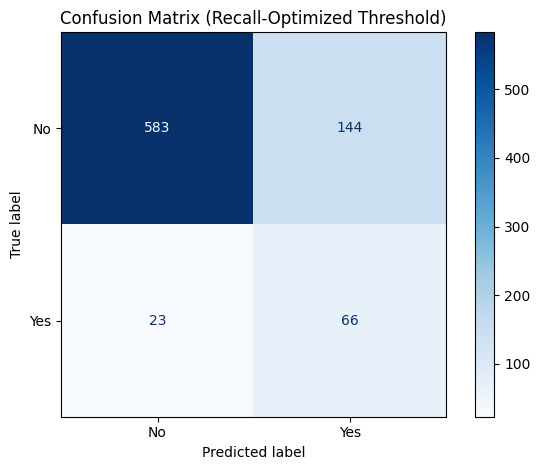

In [22]:
# Confusion Matrix
plt.figure(figsize=(4, 4))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_test_pred,
    display_labels=["No", "Yes"],
    cmap="Blues"
)
plt.title("Confusion Matrix (Recall-Optimized Threshold)")
plt.tight_layout()
plt.show()

This chart shows a visual overview of the model’s predictions. Out of 816 potential customers, the model correctly identified 66 true subscribers and incorrectly predicted 144 unsubscribed as “Yes.” This means that the marketing team will contact a total of 210 customers, and 66 of them (31%) are expected to subscribe, compared to a baseline subscription rate of about 11%.

In [23]:
fpr, tpr, roc_thresholds = roc_curve(y_test, y_test_prob)
auc = roc_auc_score(y_test, y_test_prob)

roc_idx = np.argmin(np.abs(roc_thresholds - best_t))

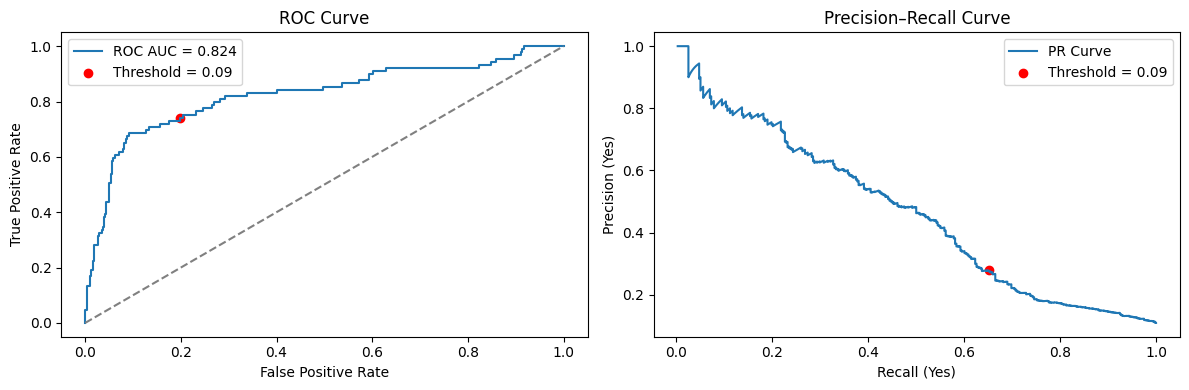

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# ROC Curve
axes[0].plot(fpr, tpr, label=f"ROC AUC = {auc:.3f}")
axes[0].scatter(
    fpr[roc_idx], tpr[roc_idx],
    color="red",
    label=f"Threshold = {best_t:.2f}"
)
axes[0].plot([0, 1], [0, 1], linestyle="--", color="gray")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].set_title("ROC Curve")
axes[0].legend()

# PR Curve
axes[1].plot(rec, prec, label="PR Curve")
axes[1].scatter(
    rec[best_idx_recall],
    prec[best_idx_recall],
    color="red",
    label=f"Threshold = {best_t:.2f}"
)
axes[1].set_xlabel("Recall (Yes)")
axes[1].set_ylabel("Precision (Yes)")
axes[1].set_title("Precision–Recall Curve")
axes[1].legend()

plt.tight_layout()
plt.show()


On the ROC curve, the model achieves an AUC of 0.824, demonstrating good ability to distinguish subscribers from non-subscribers. The red dot indicates the selected operating threshold (0.09), where the model achieves a relatively high level of true positives.

On the precision-repeatability curve, the same threshold is highlighted, showing the trade-off between getting more true subscribers and maintaining accuracy. At the selected threshold, the model prioritizes repeatability, meaning it identifies more potential subscribers, even if accuracy decreases.

### Model interpretation

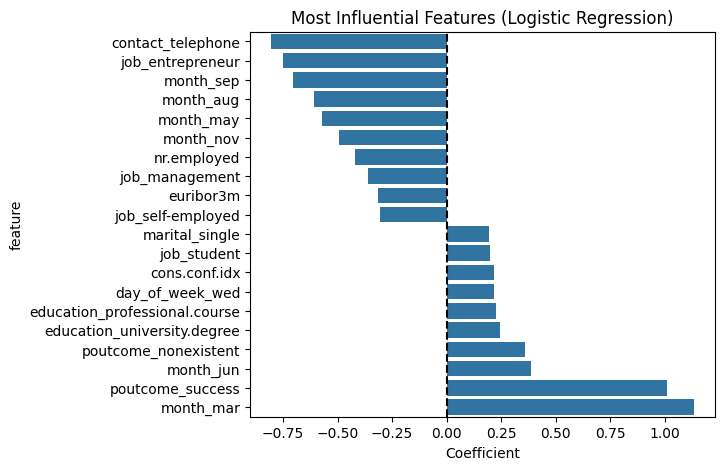

In [25]:
coef_df = pd.DataFrame({
    "feature": X.columns,
    "coef": logit_precision.coef_[0]
}).sort_values("coef")

top = 10

plt.figure(figsize=(6, 5))
sns.barplot(
    data=pd.concat([coef_df.head(top), coef_df.tail(top)]),
    x="coef",
    y="feature"
)
plt.axvline(0, color="black", linestyle="--")
plt.title("Most Influential Features (Logistic Regression)")
plt.xlabel("Coefficient")
plt.show()


An interpretation of what predictors the logistic regression model analyzes subscription behavior.

Positive coefficients: 
month_mar, 
poutcome_success, 
month: jun;
indicate conditions in which customers are more likely to subscribe. 

Negative coefficients: contact_telephone, job_entrepreneur, 
month: sep, aug, may, nov. Those are lower the probability of subscription. 

## K-Means Clustering

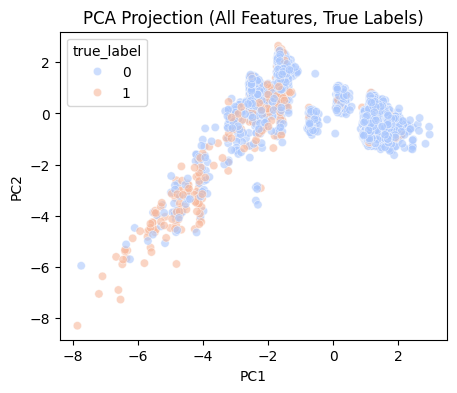

In [26]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

pca_df = pd.DataFrame({
    "PC1": X_pca[:, 0],
    "PC2": X_pca[:, 1],
    "true_label": y.values
})

plt.figure(figsize=(5,4))
sns.scatterplot(
    data=pca_df,
    x="PC1",
    y="PC2",
    hue="true_label",
    palette="coolwarm",
    alpha=0.6
)
plt.title("PCA Projection (All Features, True Labels)")
plt.show()

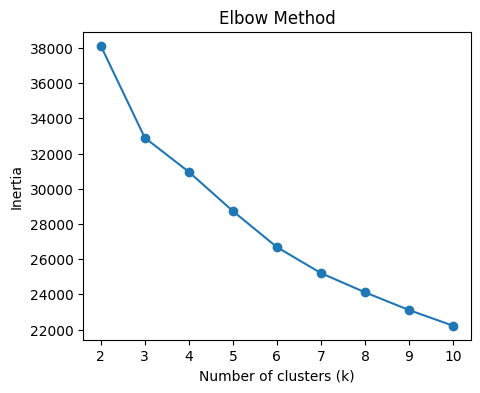

In [27]:
inertias = []
K = range(2, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    inertias.append(km.inertia_)

plt.figure(figsize=(5,4))
plt.plot(K, inertias, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


Based on the elbow method of cluster number selection, results 2 and 3 are the most interesting for comparison.

In [28]:
def evaluate_kmeans_counts(X, y_true, k):
    labels = KMeans(n_clusters=k, random_state=42, n_init=10).fit_predict(X)

    cluster_to_class = {
        c: int(round(y_true[labels == c].mean()))
        for c in np.unique(labels)
    }

    y_pred = np.array([cluster_to_class[c] for c in labels])

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    return labels, tp, fp, fn, y_pred


labels_k2, tp_k2, fp_k2, fn_k2, ypred_k2 = evaluate_kmeans_counts(X, y, k=2)
labels_k3, tp_k3, fp_k3, fn_k3, ypred_k3 = evaluate_kmeans_counts(X, y, k=3)

print(f"K=2: TP={tp_k2}, FP={fp_k2}, FN={fn_k2}")
print(f"K=3: TP={tp_k3}, FP={fp_k3}, FN={fn_k3}")

K=2: TP=0, FP=0, FN=447
K=3: TP=101, FP=60, FN=346


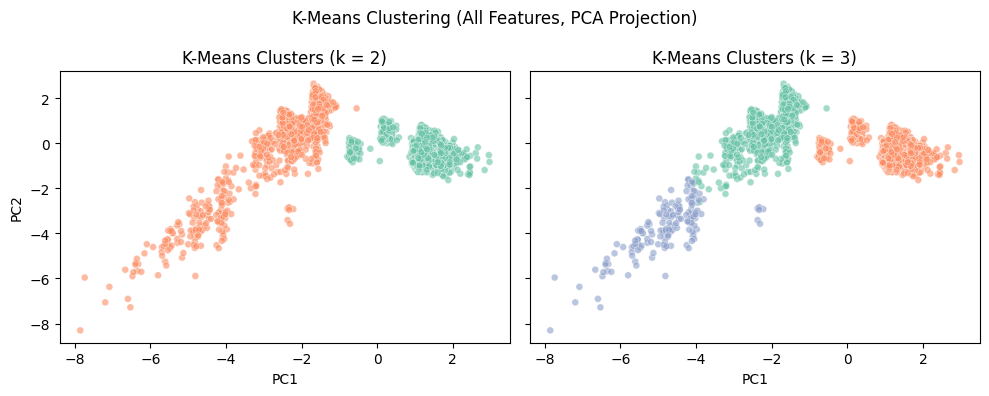

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)

for ax, labels, k in zip(
    axes,
    [labels_k2, labels_k3],
    [2, 3]
):
    plot_df = pca_df.copy()
    plot_df["cluster"] = labels

    sns.scatterplot(
        data=plot_df,
        x="PC1",
        y="PC2",
        hue="cluster",
        palette="Set2",
        alpha=0.6,
        s=25,
        ax=ax,
        legend=False
    )
    ax.set_title(f"K-Means Clusters (k = {k})")

plt.suptitle("K-Means Clustering (All Features, PCA Projection)")
plt.tight_layout()
plt.show()

At k = 2, the clusters are very wide and do not completely cover the customers who agree (TP = 0).

At k = 3, the PCA plot shows a better separation into groups, and the model correctly identifies a part of the class of subscribers (TP = 101).

This confirmation is used to choose k=3 for the following calculations.

### K-means model evaluation

In [30]:
def cluster_accuracy(labels, y_true):
    # Assign each cluster to the majority class (0 or 1)
    cluster_to_class = {}
    unique_clusters = np.unique(labels)

    for c in unique_clusters:
        cluster_values = y_true[labels == c]
        majority_class = int(cluster_values.mean() > 0.5)
        cluster_to_class[c] = majority_class

    # Predict labels
    y_pred = np.array([cluster_to_class[c] for c in labels])

    # Return accuracy and predictions
    acc = accuracy_score(y_true, y_pred)
    return acc, y_pred

acc_k3, y_pred_k3 = cluster_accuracy(labels_k3, y)
print(f"K-Means Accuracy (k=3): {acc_k3:.3f}")

K-Means Accuracy (k=3): 0.900


In [31]:
def contingency_table(labels, y_true):
    df = pd.DataFrame({
        "cluster": labels,
        "true": y_true
    })
    return pd.crosstab(df["cluster"], df["true"])

print("Contingency Table (k=3)")
print(contingency_table(labels_k3, y))

Contingency Table (k=3)
true        0    1
cluster           
0         963  215
1        2610  131
2          60  101


<Figure size 500x400 with 0 Axes>

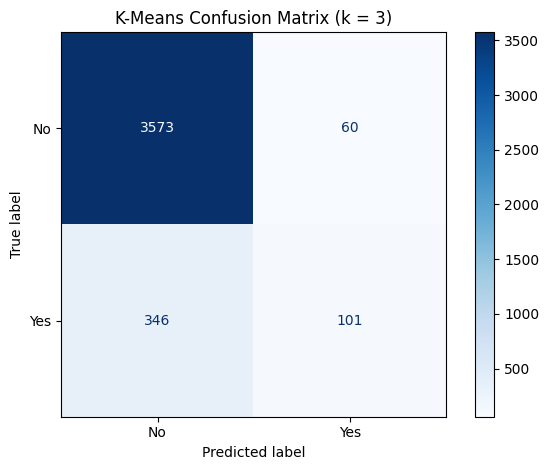

In [32]:
plt.figure(figsize=(5, 4))

ConfusionMatrixDisplay.from_predictions(
    y,
    y_pred_k3,
    display_labels=["No", "Yes"],
    cmap="Blues"
)

plt.title("K-Means Confusion Matrix (k = 3)")
plt.tight_layout()
plt.show()


The K-means model correctly identifies 101 out of 447 subscribers, covering about 22.6% of all true subscribers.

In contrast, the logistic regression model with mapping optimization identifies 74% of true subscribers in the test data.

The results show that logistic regression is much more effective at identifying potential customers.

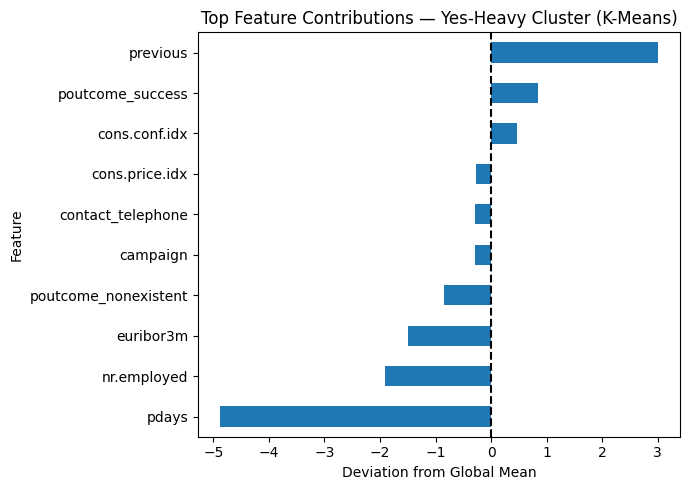

In [33]:
df_feat = pd.DataFrame(X, columns=X.columns)
df_feat["cluster"] = labels

df_feat["y"] = y.values
yes_rate = df_feat.groupby("cluster")["y"].mean()

yes_cluster = yes_rate.idxmax()

cluster_means = df_feat.groupby("cluster").mean()
global_mean = df_feat.drop(columns=["cluster", "y"]).mean()

cluster_diff = cluster_means.drop(columns="y") - global_mean

top = 10
top_features = (
    cluster_diff.loc[yes_cluster]
    .abs()
    .sort_values(ascending=False)
    .head(top)
    .index
)

# Plot
plt.figure(figsize=(7, 5))
cluster_diff.loc[yes_cluster, top_features] \
    .sort_values() \
    .plot(kind="barh")

plt.axvline(0, color="black", linestyle="--")
plt.title("Top Feature Contributions — Yes-Heavy Cluster (K-Means)")
plt.xlabel("Deviation from Global Mean")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


The chart shows which characteristics differ the most between the “yes” cluster and the overall data set.

Characteristics such as previous contacts and poutcome_success have significantly higher mean values ​​in the subscriber cluster compared to the global mean, indicating that customers in this group tend to have more previous interactions with the bank and more successful past outcomes.

In contrast, characteristics such as pdays, nr.employed, and euribor3m have lower mean values ​​in this cluster, meaning that subscribers tend to fall into the parts of the data where these variables take on lower values.

## t-SNE

t-SNE was applied to the full preprocessed feature matrix (scaled numeric features + one-hot encoded categorical features) to create a 2-D visualization of customer patterns.

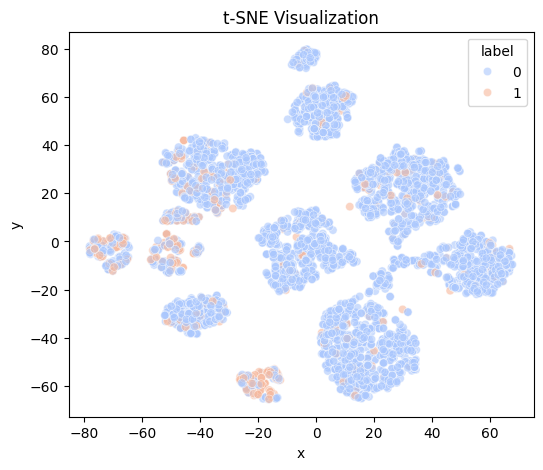

In [34]:
tsne = TSNE(
    n_components=2,
    perplexity=30,
    random_state=42
)

X_tsne = tsne.fit_transform(X)

tsne_df = pd.DataFrame({
    "x": X_tsne[:, 0],
    "y": X_tsne[:, 1],
    "label": y.values
})

plt.figure(figsize=(6,5))
sns.scatterplot(
    data=tsne_df,
    x="x",
    y="y",
    hue="label",
    palette="coolwarm",
    alpha=0.6
)
plt.title("t-SNE Visualization")
plt.show()


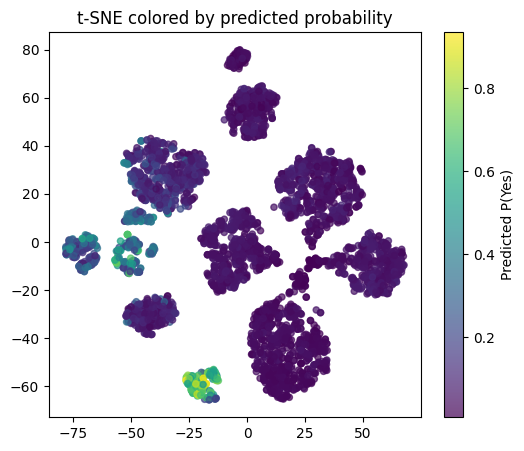

In [35]:
X_model = pd.concat(
    [
        X_numeric_scaled[numeric_cols_clean],
        X_categorical_encoded
    ],
    axis=1
)
y_prob = logit_precision.predict_proba(X_model)[:, 1]
tsne_df["prob_yes"] = y_prob


tsne_df["prob_yes"] = y_prob

plt.figure(figsize=(6,5))
plt.scatter(
    tsne_df["x"],
    tsne_df["y"],
    c=tsne_df["prob_yes"],
    cmap="viridis",
    s=20,
    alpha=0.7
)
plt.colorbar(label="Predicted P(Yes)")
plt.title("t-SNE colored by predicted probability")
plt.show()



In [36]:
tsne_cluster = KMeans(n_clusters=10, random_state=42).fit_predict(
    tsne_df[["x", "y"]]
)

tsne_df["tsne_cluster"] = tsne_cluster
tsne_df.groupby("tsne_cluster")["label"].mean().sort_values(ascending=False)

tsne_cluster
8    0.632911
9    0.339943
1    0.129088
4    0.085366
5    0.066563
0    0.051919
7    0.043977
3    0.041885
2    0.036923
6    0.033097
Name: label, dtype: float64

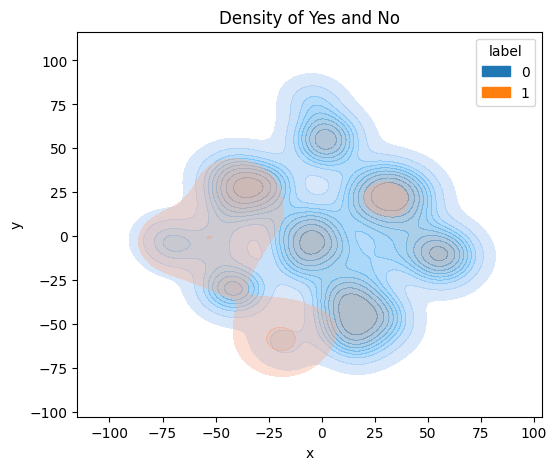

In [37]:
df_analysis = df_clean.copy()
df_analysis["tsne_cluster"] = tsne_df["tsne_cluster"].values
df_analysis["label"] = y.values  

plt.figure(figsize=(6,5))
sns.kdeplot(
    x=tsne_df["x"], y=tsne_df["y"],
    hue=tsne_df["label"],
    fill=True,
    alpha=0.4
)
plt.title("Density of Yes and No")
plt.show()


In [38]:
yes_island = (
    df_analysis
    .groupby("tsne_cluster")["label"]
    .mean()
    .idxmax()
)

df_analysis.loc[
    df_analysis["tsne_cluster"] == yes_island,
    numeric_cols
].describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,42.386076,1.791139,5.898734,1.778481,-2.007595,93.417829,-38.367722,1.018551,5025.832911
std,14.426499,1.128969,3.923131,1.115173,0.859828,0.804302,6.478895,0.662621,55.528158
min,18.000000,1.000000,0.000000,1.000000,-3.400000,92.201000,-50.800000,0.637000,4963.600000
25%,31.000000,1.000000,3.000000,1.000000,-2.900000,92.713000,-40.800000,0.716750,4991.600000
50%,38.000000,1.000000,6.000000,1.000000,-1.800000,93.369000,-38.300000,0.878000,5008.700000
75%,52.000000,2.000000,6.000000,2.000000,-1.700000,94.163000,-33.000000,1.017250,5076.200000
max,86.000000,7.000000,21.000000,6.000000,-0.100000,94.767000,-26.900000,4.191000,5195.800000


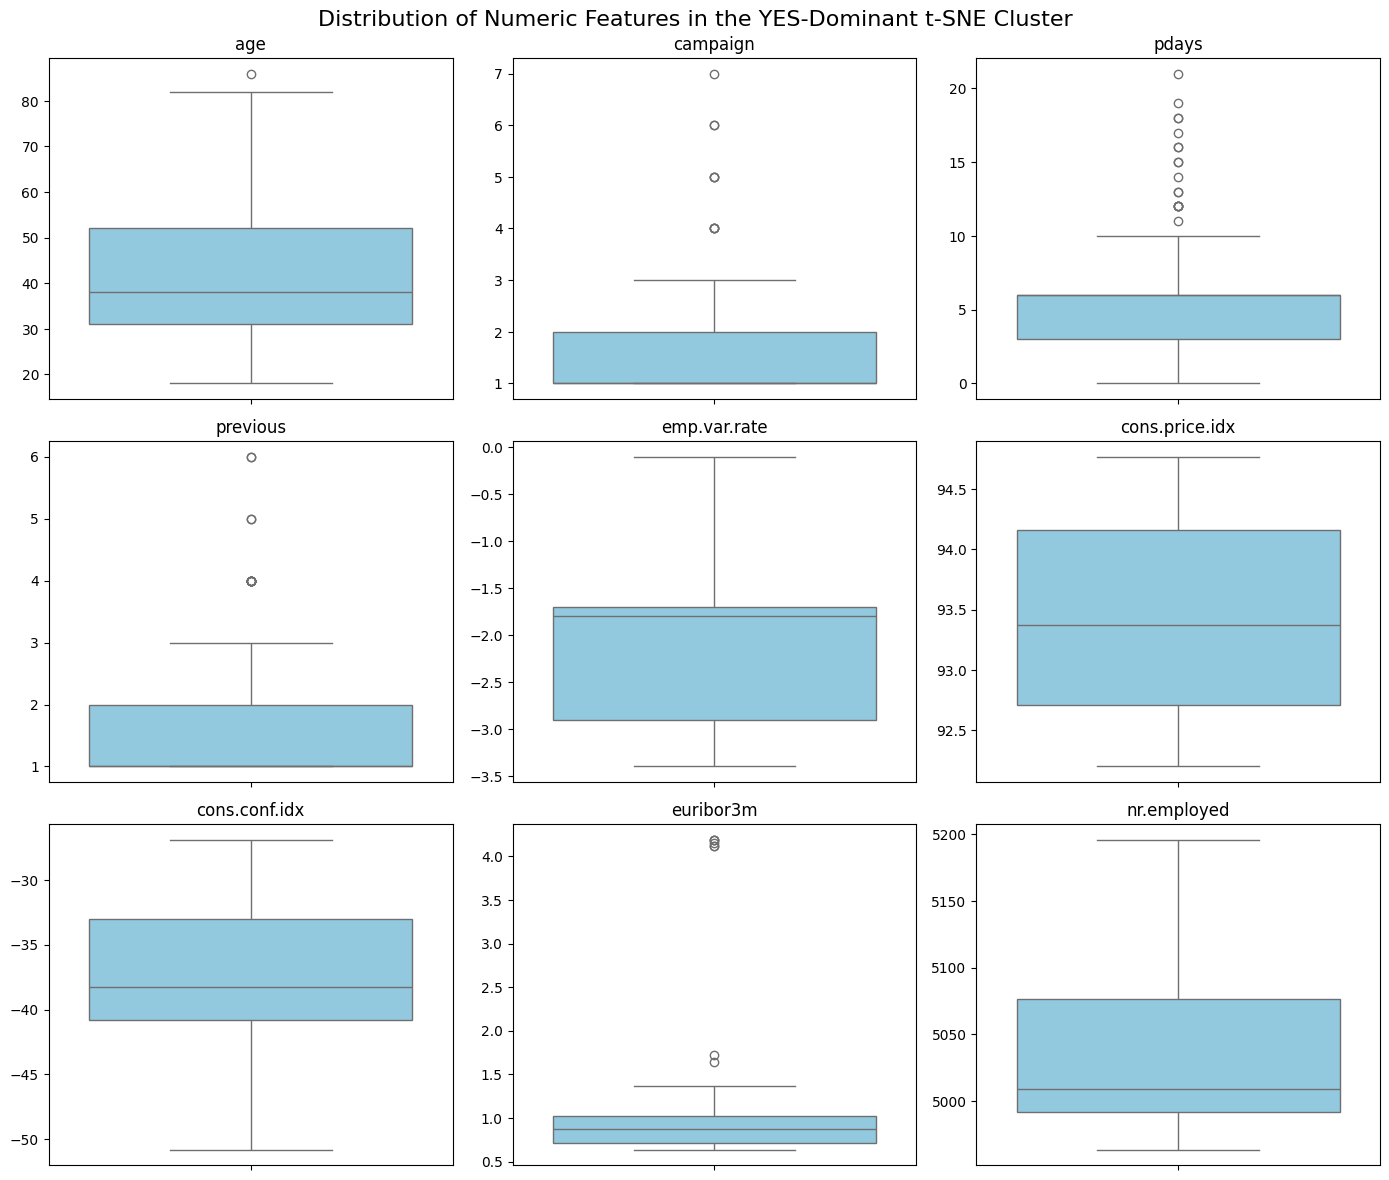

In [39]:
yes_cluster_df = df_analysis.loc[
    df_analysis["tsne_cluster"] == yes_island,
    numeric_cols
]

plot_cols = numeric_cols
n_plots = len(plot_cols)
n_cols = 3
n_rows = int(np.ceil(n_plots / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 12))
axes = axes.flatten()

for ax, col in zip(axes, plot_cols):
    sns.boxplot(
        data=yes_cluster_df,
        y=col,
        ax=ax,
        color="skyblue"
    )
    ax.set_title(col)
    ax.set_xlabel("")
    ax.set_ylabel("") 

for i in range(len(plot_cols), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle("Distribution of Numeric Features in the YES-Dominant t-SNE Cluster", fontsize=16)
plt.tight_layout()
plt.show()


The t-SNE boxplots of the “yes” cluster show several consistent patterns among customers who are more likely to accept a term deposit:

They are typically between 30 and 50 years old.

They are typically contacted once or twice.

Their last contact with the bank was within a few days.

They often have one or two previous interactions.

**Macroeconomic conditions.**

Customers in this cluster tend to come from periods with:

Negative employment fluctuations

Lower consumer confidence

Lower interest rates

Stable but gradually rising prices

## Storytelling and Conclusions

<Figure size 400x400 with 0 Axes>

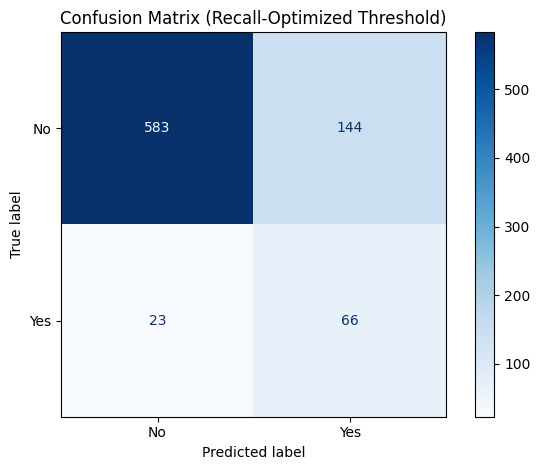

In [40]:
# Confusion Matrix
plt.figure(figsize=(4, 4))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_test_pred,
    display_labels=["No", "Yes"],
    cmap="Blues"
)
plt.title("Confusion Matrix (Recall-Optimized Threshold)")
plt.tight_layout()
plt.show()

This project examined a set of marketing data from UCI Bank. The research addressed two main questions: 1. Which customers are most likely to open a term deposit? 2. How do macroeconomic factors influence customer choice? Logistic regression and K-means clustering were used in the work.

Results The logistic regression model with recall optimization identifies about 74% of all true subscribers, which is important for a marketing company because losing potential customers is undesirable. By increasing the level of identifying true customers, the accuracy was reduced (≈31%). The confusion matrix shows that out of 816 test customers, the model correctly identifies 66 subscribers and identifies 144 additional customers who may also be worth contacting. Despite identifying false positives, this selection is much more effective than the baseline subscription rate of the dataset, which is only 11%.

In addition to supervised modeling, K-means clustering was used to explore natural groups in the data. Although K-means successfully identified a cluster rich in subscribers, its ability to actually recover true subscribers was limited: the model correctly identified 101 out of 447 subscribers, capturing only 22.6% of the “yes” class. In contrast, the logistic regression model with recall optimization identified 74% of true subscribers in the test set. These results show that logistic regression is much more effective at identifying potential customers.


Interpreting the performance of the logistic regression, we see that the model used customer-level factors to determine the probability of subscribing. The probability of subscribing is higher in March and June and if the customers have a previous successful outcome. In contrast, characteristics such as contact method (phone or celular) and several months (September, August, May, November) reduce the probability of subscribing.

K-means clustering shows that a cluster with a large number of subscribers is characterized by a higher level of prior contact and a higher probability of subscribing during the previous campaign. It also shows that subscribers tend to emerge during periods of recent contact, lower employment levels, and lower interest rates.

The results of EDA and t-SNE suggest that potential subscribers share several characteristics. They are most often in the 30-50 age range, often belong to groups such as retirees, students, administrators or unemployed customers, and are slightly more likely to be single and have a higher education. Successful conversions usually occur after 1-2 contacts, especially when the customer has been contacted recently (within 3-6 days) and has previously responded “yes” to a previous campaign. Subscribers are also typically contacted via mobile. From an economic perspective, customers are more likely to subscribe during periods of negative employment fluctuations, low interest rates, moderately low consumer confidence and rising prices. The best months for a campaign are December, March and October. Then the worst months are May, July, August and November.

There are important limitations to consider. The dataset only reflects the economic crisis of 2008–2010, which means that behavior may differ in more stable years. Some macrovariables also show strong multicollinearity, which limits interpretation. In addition, the data has a strong imbalance between “no” and “yes” responses. Despite this issue, adjusting the decision threshold allowed us to recover a much higher proportion of true subscribers.

### Chat GPT USAGE: 

**Prompt 1**
I plan to work on the marketing dataset. Before I create my own story to tell, help me give more of an overview about the initial questions authors try to answer, what they used, and what the results

**Interesting finding from response:**
Sub-questions (Based on Table 1 of the paper)
Does the offered interest rate influence the likelihood of a sale?
Does agent gender or experience matter?
Does the client’s financial situation or relationship with the bank matter?
Do call context factors matter? (inbound vs outbound call, previous scheduled calls, etc.)
Do social & economic indicators influence success?
(e.g., employment rate, consumer confidence, Euribor)
Does age or location matter?

Data
52,944 bank telemarketing calls (May 2008–June 2013)
Only 12.38% were successful → highly imbalanced dataset

Top Predictors
3-month Euribor interest rate
Call direction (inbound > outbound)
Agent experience (days working)
Difference between bank’s offered rate & national average
Duration of previously scheduled calls

Lower Euribor correlates with higher likelihood of saving, especially after the 2008 crisis.

**Prompt 2**
Help me write a Python function that improves true-positive results in a logistic-regression classification problem. I want to adjust the classification threshold to increase recall (reduce false negatives).

**Code I used AI-Generated Output**

Generate precision–recall curve values

prec, rec, thresholds = precision_recall_curve(y_train, y_train_prob)
prec = prec[:-1]
rec  = rec[:-1]

Calculate the F1-optimal threshold

f1 = 2 * (prec * rec) / (prec + rec + 1e-9)
best_idx_f1 = np.argmax(f1)
best_t_f1 = thresholds[best_idx_f1]

Select a threshold that satisfies a minimum recall requirement (0.65)

MIN_RECALL = 0.65  
mask = rec >= MIN_RECALL

if mask.any():
    idxs = np.where(mask)[0]
    best_idx_recall = idxs[-1]
    best_t = thresholds[best_idx_recall]
else:
    best_idx_recall = best_idx_f1
    best_t = best_t_f1


Return precision and recall at the chosen threshold.

**Prompt 3**
Help me to write README. Here is folder structure (attached image)